### 1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 76.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 53.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:0

In [3]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

2023-06-24 03:09:53.333972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 03:09:53.403972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 03:09:53.404966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 03:09:54.524492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


### 2. Load the Wine Quality dataset and explore its dimensions.

In [5]:
df=pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [6]:
#Exploring the dimensions
df.shape

(1599, 12)

In [7]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

### 3. Check for null values, identify categorical variables, and encode them.

In [8]:
## Checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values

In [9]:
## Separating numerical and categorical values
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [10]:
#Encoding the target variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 4. Separate the features and target variables from the dataframe.

In [11]:
X = df.drop('quality',axis=1)
y = df['quality']

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

### 6. Perform scaling on the dataset.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled = pd.DataFrame(scaled_features)

# Concatenate the scaled features with the target variable
scaled_data_with_target = pd.concat([X_scaled,y], axis=1)


print("Scaled data (StandardScaler):")
print(scaled_data_with_target)

Scaled data (StandardScaler):
             0         1         2         3         4         5         6  \
0    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
1    -0.298547  1.967442 -1.391472  0.043416  0.223875  0.872638  0.624363   
2    -0.298547  1.297065 -1.186070 -0.169427  0.096353 -0.083669  0.229047   
3     1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.107592  0.411500   
4    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -1.217796  0.403229 -0.980669 -0.382271  0.053845  1.542054 -0.075043   
1595 -1.390155  0.123905 -0.877968 -0.240375 -0.541259  2.211469  0.137820   
1596 -1.160343 -0.099554 -0.723916 -0.169427 -0.243707  1.255161 -0.196679   
1597 -1.390155  0.654620 -0.775267 -0.382271 -0.264960  1.542054 -0.075043   
1598 -1.332702 -1.216849  1.021999  0.752894 -0.434990  0.203223 -0.135861   

             7         8         

In [15]:
X=X_scaled

In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [17]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

### 5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [18]:
from sklearn.model_selection import train_test_split

X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.25, random_state=42
)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (959, 11)
Validation set shape: (320, 11)
Test set shape: (320, 11)


### 7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [19]:
LAYERS = [tf.keras.layers.Dense(units=300, activation="relu", name="hiddenLayer1",input_dim=11),
          tf.keras.layers.Dense(units=100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(units=1, activation='sigmoid', name="outputLayer")]

### 8. Create a Sequential model and add all the layers to it.

In [20]:
model_clf= tf.keras.models.Sequential(LAYERS)

In [21]:
model_clf.layers

### 9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [22]:
# Logging

import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_06_24_03_21_21


### 10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [23]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

### 11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [24]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

### 12. Print the model summary.

In [25]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_________________________________________________________________


### 13.Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [26]:
LOSS_FUNCTION = "binary_crossentropy" 
OPTIMIZER = "adam" 
METRICS = ["accuracy"]

### 14. Compile the model with the specified loss function, optimizer, and metrics.

In [27]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

### 15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [28]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_val, y_val)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
30/30 [==============================] - 1s 12ms/step - loss: 0.5680 - accuracy: 0.7049 - val_loss: 0.5447 - val_accuracy: 0.7188
Epoch 2/30
30/30 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.7487 - val_loss: 0.5279 - val_accuracy: 0.7594
Epoch 3/30
30/30 [==============================] - 0s 5ms/step - loss: 0.4849 - accuracy: 0.7654 - val_loss: 0.5216 - val_accuracy: 0.7844
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.7560 - val_loss: 0.5242 - val_accuracy: 0.7625
Epoch 5/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7696 - val_loss: 0.5337 - val_accuracy: 0.7781
Epoch 6/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7737 - val_loss: 0.5407 - val_accuracy: 0.7656
Epoch 7/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.7842 - val_loss: 0.5210 - val_accuracy: 0.7719
Epoch 8/30
30/30 [=

In [29]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/30
30/30 [==============================] - 1s 9ms/step - loss: 0.4408 - accuracy: 0.7894 - val_loss: 0.5515 - val_accuracy: 0.7625
Epoch 2/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.7873 - val_loss: 0.5415 - val_accuracy: 0.7688
Epoch 3/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.8029 - val_loss: 0.5487 - val_accuracy: 0.7656
Epoch 4/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.8029 - val_loss: 0.5497 - val_accuracy: 0.7563
Epoch 5/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.8081 - val_loss: 0.5306 - val_accuracy: 0.8000
Epoch 6/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.7977 - val_loss: 0.5418 - val_accuracy: 0.7844
Epoch 7/30
30/30 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8206 - val_loss: 0.5474 - val_accuracy: 0.7656
Epoch 8/30
30/30 [==

In [30]:
#Saving the model
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [31]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

Model Model_2023_06_24_03_35_32_.h5 will be saved at TRAINED_MODEL/Model_2023_06_24_03_35_32_.h5


'TRAINED_MODEL/Model_2023_06_24_03_35_32_.h5'

In [32]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

### 16. Get the model's parameters.

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 30}

### 17. Store the model's training history as a Pandas DataFrame.

In [34]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.440815,0.789364,0.551494,0.762500
1,0.436889,0.787278,0.541503,0.768750
2,0.432035,0.802920,0.548693,0.765625
3,0.422837,0.802920,0.549719,0.756250
4,0.417636,0.808133,0.530560,0.800000
5,0.415310,0.797706,0.541803,0.784375
6,0.405840,0.820647,0.547402,0.765625
7,0.399911,0.817518,0.551219,0.756250
8,0.394351,0.820647,0.552872,0.775000
9,0.388102,0.822732,0.545243,0.759375


### 18. Plot the model's training history.

<AxesSubplot: >

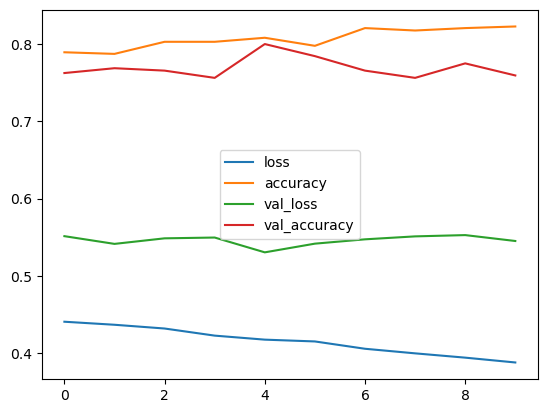

In [35]:
pd.DataFrame(history.history).plot()

### 19. Evaluate the model's performance using the test data.

In [36]:
model_clf.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7437


[0.4881347119808197, 0.7437499761581421]